## Multilabel

Múltiple cantidad de posibles salidas, MUCHAS pueden ser las correctas.

### Problem transformation:
Transforma el problema para llevarlo a uno de multiclass
- **Binary Relevance**: Entrenar cada uno por separado. Puede haber fuerte correlación y este modelo no lo tiene en cuenta. Es decir, dada una clase, es muy poco probable que pertenezca a otra clase o viceverza.
- **Classifier Chains**: Usar salida de las clases anteriores como entrada. Puede tener el problema que si predigo mal una clase, condiciono la predicción de la siguiente. Es un pipeline, uno informa el resultado al otro pero no viceverza.
- **Label Powerset**: Generar tantas clases como combinaciones de posibles salidas haya en el dataset. A medida que el dataset crece podrían aparecer todas las combinaciones de clases.

In [2]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Activation
from helper import PlotLosses
from keras.callbacks import ModelCheckpoint
from keras.initializers import RandomNormal
from keras import regularizers

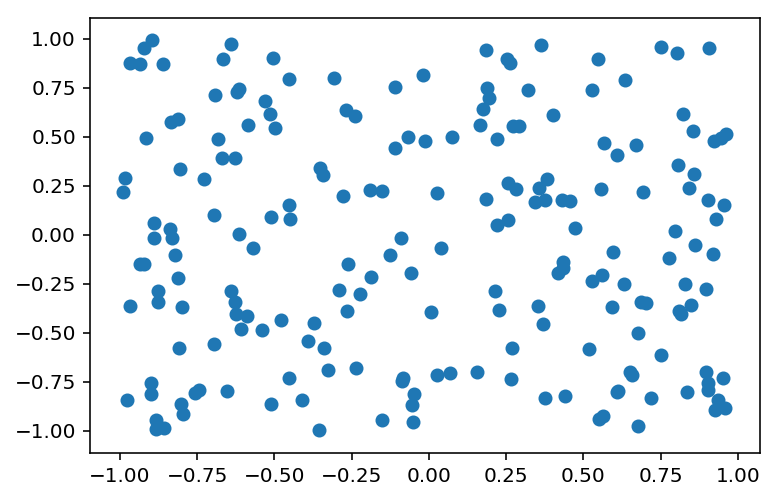

In [5]:
N = 200
X1 = np.random.uniform(-1,1, N)
X2 = np.random.uniform(-1,1, N)
X = np.vstack([X1, X2]).T
plt.scatter(X1, X2)
plt.show()

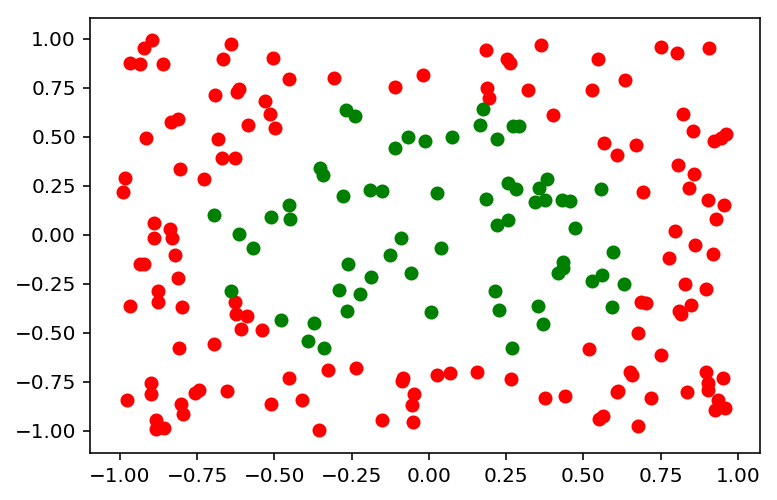

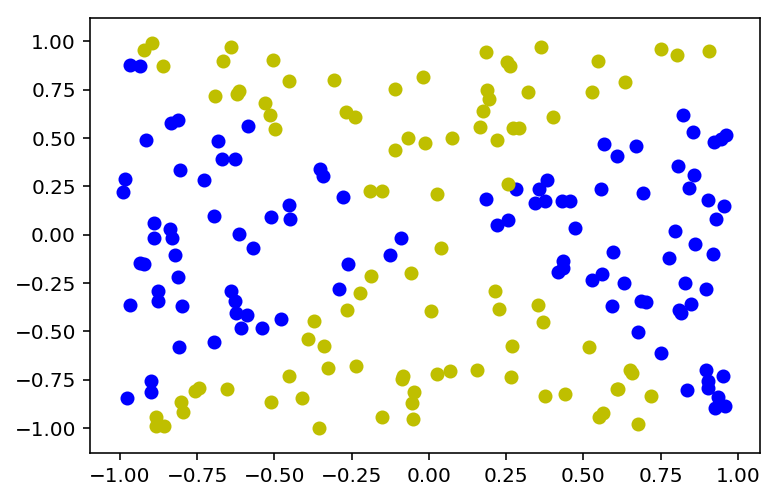

In [6]:
y = []
for x in X:
    yaux = np.array([0, 0, 0, 0])
    if x[0]**2+x[1]**2>0.5:
        yaux = yaux + np.array([1, 0, 0, 0])
    else:
        yaux = yaux + np.array([0, 1, 0, 0])
    if x[0]**2-x[1]**2>0:
        yaux = yaux + np.array([0, 0, 1, 0])
    else:
        yaux = yaux + np.array([0, 0, 0, 1])
    y.append(list(yaux))
y = np.array(y)

plt.scatter(X[y[:,0]==1, 0], X[y[:,0]==1, 1], c='r')
plt.scatter(X[y[:,1]==1, 0], X[y[:,1]==1, 1], c='g')
plt.show()
plt.scatter(X[y[:,2]==1, 0], X[y[:,2]==1, 1], c='b')
plt.scatter(X[y[:,3]==1, 0], X[y[:,3]==1, 1], c='y')
plt.show()

---
### Red Neuronal Sigmoideas + binary_crossentropy

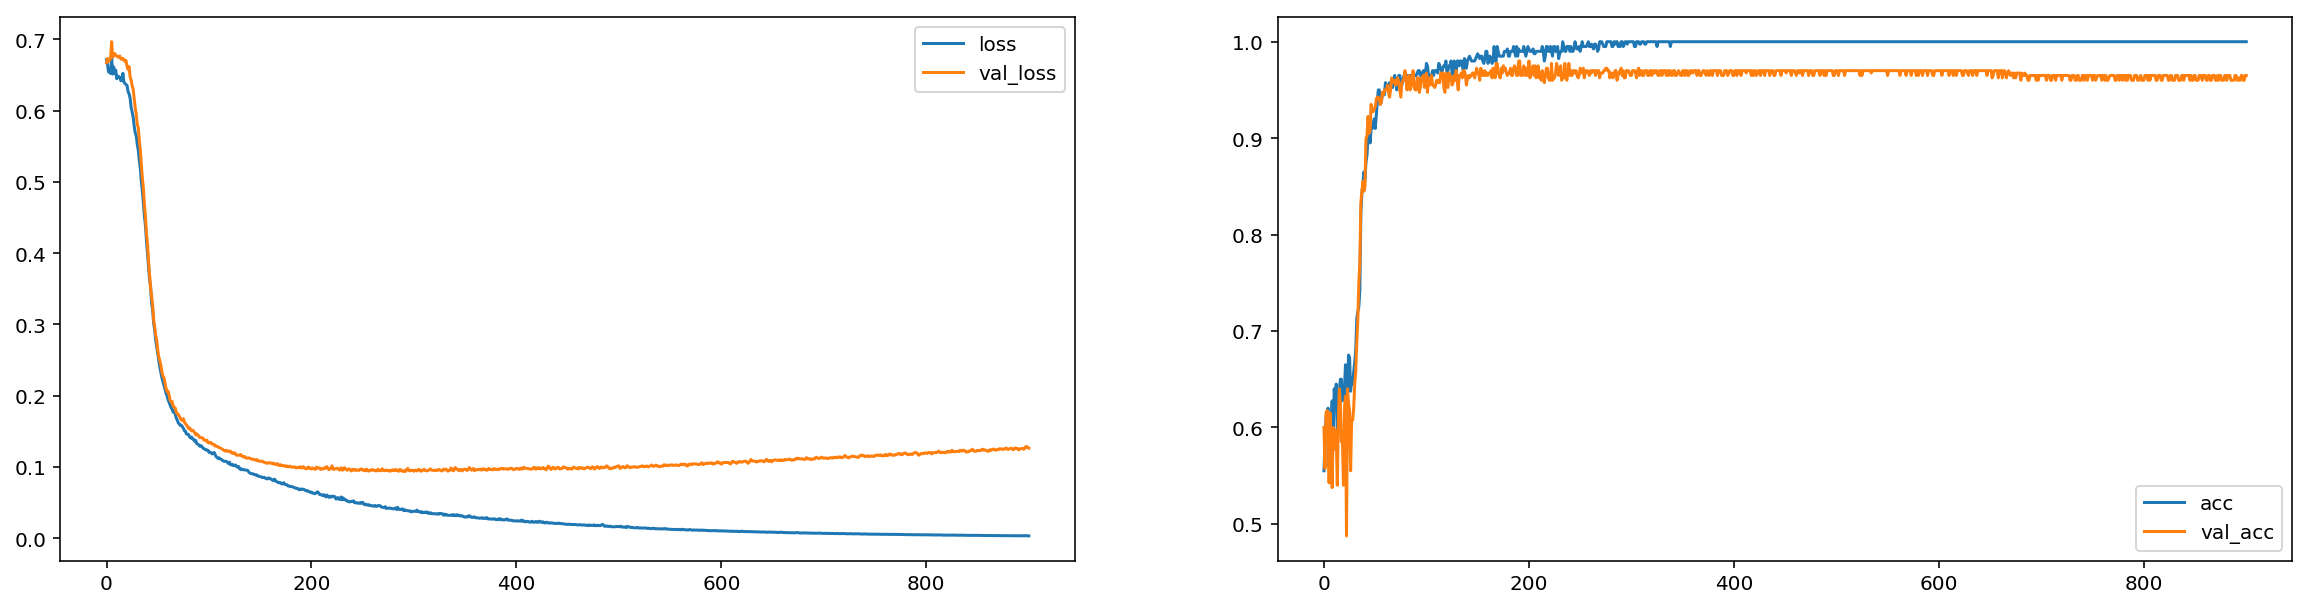

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

hidden_units = 20
input_features=2
output_size = y_train.shape[1]
lambd = 0 #0.001
model_sig_nn = Sequential()
model_sig_nn.add(Dense(hidden_units,input_dim=input_features, kernel_regularizer=regularizers.l2(lambd), name="Capa_Oculta"))
model_sig_nn.add(Activation('sigmoid', name="sigmoid"))
model_sig_nn.add(Dense(output_size, name="Salida"))
model_sig_nn.add(Activation('sigmoid', name="output")) 
model_sig_nn.summary()


lr = 0.05 
batch_size = 20
epochs = 1000

#selectedOptimizer = optimizers.SGD(lr=lr)
selectedOptimizer = optimizers.adam(lr=lr)

# Lo compilo, notar que en vez de binary_crossentropy va categorical_crossentropy
model_sig_nn.compile(loss = 'binary_crossentropy', optimizer=selectedOptimizer, metrics=['accuracy'])

plot_losses = PlotLosses(plot_interval=100, 
                         evaluate_interval=None, 
                         x_val=X_test, 
                         y_val_categorical=y_test)
model_sig_nn.fit(X_train, 
          y_train, 
          batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )